<a href="https://colab.research.google.com/github/comandi1969/AIFFEL_Online_Quest/blob/main/MainQuest/%EA%B0%80%EC%9C%84%EB%B0%94%EC%9C%84%EB%B3%B4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [205]:
import tensorflow as tf
import numpy as np

print(tf.__version__)
print(np.__version__)

2.12.0
1.22.4


In [206]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [207]:
from PIL import Image
import glob
import os

print("PIL 라이브러리 import 완료!")

PIL 라이브러리 import 완료!


In [208]:
def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")

	print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")

	print(len(images), " images resized.")

# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
# image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/scissor"
image_dir_path_paper = "/content/drive/MyDrive/rock_scissor_paper/paper"
resize_images(image_dir_path_paper)
print("보 이미지 resize 완료!")

image_dir_path_rock = "/content/drive/MyDrive/rock_scissor_paper/rock"
resize_images(image_dir_path_rock)
print("바위 이미지 resize 완료!")

image_dir_path_scissor = "/content/drive/MyDrive/rock_scissor_paper/scissor"
resize_images(image_dir_path_scissor)
print("가위 이미지 resize 완료!")




100  images to be resized.


<ipython-input-208-e9dc83bbc6ce>:10: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  new_img=old_img.resize(target_size,Image.ANTIALIAS)


100  images resized.
보 이미지 resize 완료!
100  images to be resized.
100  images resized.
바위 이미지 resize 완료!
100  images to be resized.
100  images resized.
가위 이미지 resize 완료!


In [209]:
# 학습 데이터 준비
import numpy as np
import os
import matplotlib.pyplot as plt

def load_data(img_path, number_of_data=300):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1

    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1

    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = "/content/drive/MyDrive/rock_scissor_paper"
(x_train, y_train)=load_data(image_dir_path)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 300 입니다.
x_train shape: (300, 28, 28, 3)
y_train shape: (300,)


라벨:  0


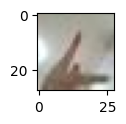

In [210]:
import matplotlib.pyplot as plt
plt.figure(figsize=(1, 1))
plt.imshow(x_train[0])
print('라벨: ', y_train[0])


라벨:  1


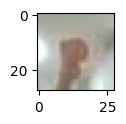

In [211]:
import matplotlib.pyplot as plt
plt.figure(figsize=(1, 1))
plt.imshow(x_train[100])
print('라벨: ', y_train[100])

라벨:  2


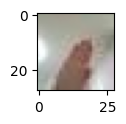

In [212]:
import matplotlib.pyplot as plt
plt.figure(figsize=(1, 1))
plt.imshow(x_train[200])
print('라벨: ', y_train[200])

In [213]:
print(f'x_train.shape => {x_train.shape}')
print(f'y_train.shape => {y_train.shape}')


x_train.shape => (300, 28, 28, 3)
y_train.shape => (300,)


In [214]:
print('최소값:',np.min(x_train), ' 최대값:',np.max(x_train))

최소값: 0  최대값: 255


In [215]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

n_channel_1=32
n_channel_2=64
n_dense=64
n_train_epoch=10

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

model.summary()



Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_44 (Conv2D)          (None, 26, 26, 32)        896       
                                                                 
 max_pooling2d_44 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_45 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_45 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                            
                                                                 
 flatten_21 (Flatten)        (None, 1600)              0         
                                                                 
 dense_42 (Dense)            (None, 64)              

In [216]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train_norm, y_train, epochs=n_train_epoch)

Epoch 1/10
10/10 [==============================] - 2s 31ms/step - loss: 1.1108 - accuracy: 0.3367
Epoch 2/10
10/10 [==============================] - 0s 31ms/step - loss: 1.0780 - accuracy: 0.3633
Epoch 3/10
10/10 [==============================] - 0s 32ms/step - loss: 1.0266 - accuracy: 0.6333
Epoch 4/10
10/10 [==============================] - 0s 30ms/step - loss: 0.9361 - accuracy: 0.7100
Epoch 5/10
10/10 [==============================] - 0s 30ms/step - loss: 0.7720 - accuracy: 0.7400
Epoch 6/10
10/10 [==============================] - 0s 28ms/step - loss: 0.5825 - accuracy: 0.8133
Epoch 7/10
10/10 [==============================] - 0s 28ms/step - loss: 0.4245 - accuracy: 0.8867
Epoch 8/10
10/10 [==============================] - 0s 31ms/step - loss: 0.3315 - accuracy: 0.8800
Epoch 9/10
10/10 [==============================] - 0s 30ms/step - loss: 0.2509 - accuracy: 0.9400
Epoch 10/10
10/10 [==============================] - 0s 29ms/step - loss: 0.1819 - accuracy: 0.9533


In [217]:
# 테스트 데이터 리사이즈
def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")

	print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")

	print(len(images), " images resized.")

# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
# image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/scissor"
image_dir_path_paper = "/content/drive/MyDrive/rock_scissor_paper2/paper"
resize_images(image_dir_path_paper)
print("보 이미지 resize 완료!")

image_dir_path_rock = "/content/drive/MyDrive/rock_scissor_paper2/rock"
resize_images(image_dir_path_rock)
print("바위 이미지 resize 완료!")

image_dir_path_scissor = "/content/drive/MyDrive/rock_scissor_paper2/scissor"
resize_images(image_dir_path_scissor)
print("가위 이미지 resize 완료!")

100  images to be resized.


<ipython-input-217-64ee52a5fdc3>:11: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  new_img=old_img.resize(target_size,Image.ANTIALIAS)


100  images resized.
보 이미지 resize 완료!
100  images to be resized.
100  images resized.
바위 이미지 resize 완료!
100  images to be resized.
100  images resized.
가위 이미지 resize 완료!


In [218]:
# 테스트 데이터 준비
import numpy as np
import os
import matplotlib.pyplot as plt

def load_data(img_path, number_of_data=300):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1

    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1

    print("테스트데이터(x_test)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = "/content/drive/MyDrive/rock_scissor_paper2"
(x_test, y_test)=load_data(image_dir_path)
x_test_norm = x_test/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

테스트데이터(x_test)의 이미지 개수는 300 입니다.
x_test shape: (300, 28, 28, 3)
y_test shape: (300,)


In [219]:
test_loss, test_accuracy = model.evaluate(x_test_norm, y_test, verbose=2)
print(f"test_loss: {test_loss}")
print(f"test_accuracy: {test_accuracy}")

10/10 - 0s - loss: 1.3261 - accuracy: 0.6667 - 247ms/epoch - 25ms/step
test_loss: 1.3261134624481201
test_accuracy: 0.6666666865348816


10/10 [==============================] - 0s 9ms/step
model.predict() 결과 :  [0.01168317 0.2762868  0.71203   ]
model이 추론한 가장 가능성이 높은 결과 :  2
실제 데이터의 라벨 :  2


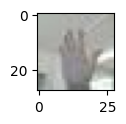

In [220]:
predicted_result = model.predict(x_test_norm)  # model이 추론한 확률값.
predicted_labels = np.argmax(predicted_result, axis=1) # model이 추론한 숫자

idx=250  #1번째 x_test를 살펴보자.
print('model.predict() 결과 : ', predicted_result[idx])
print('model이 추론한 가장 가능성이 높은 결과 : ', predicted_labels[idx])
print('실제 데이터의 라벨 : ', y_test[idx])

plt.figure(figsize=(1, 1))
plt.imshow(x_test[idx],cmap=plt.cm.binary)
plt.show()

예측확률분포: [0.01409861 0.06416143 0.92173994]
라벨: 1, 예측결과: 2


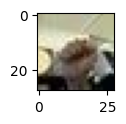

예측확률분포: [0.01858257 0.14733663 0.8340809 ]
라벨: 1, 예측결과: 2


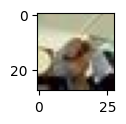

예측확률분포: [0.04070917 0.11638565 0.8429052 ]
라벨: 1, 예측결과: 2


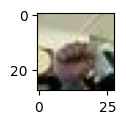

예측확률분포: [0.06313536 0.01164987 0.92521477]
라벨: 1, 예측결과: 2


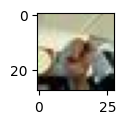

예측확률분포: [6.9873613e-01 2.6061872e-04 3.0100325e-01]
라벨: 1, 예측결과: 0


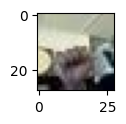

In [221]:
import random
wrong_predict_list=[]
for i, _ in enumerate(predicted_labels):
    # i번째 test_labels과 y_test이 다른 경우만 모아 봅시다.
    if predicted_labels[i] != y_test[i]:
        wrong_predict_list.append(i)

# wrong_predict_list 에서 랜덤하게 5개만 뽑아봅시다.
samples = random.choices(population=wrong_predict_list, k=5)

for n in samples:
    print("예측확률분포: " + str(predicted_result[n]))
    print("라벨: " + str(y_test[n]) + ", 예측결과: " + str(predicted_labels[n]))
    plt.figure(figsize=(1, 1))
    plt.imshow(x_test[n], cmap=plt.cm.binary)
    plt.show()